In [98]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV
import pandas as pd
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import f_classif
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import plotly.figure_factory as ff
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import validation_curve
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import eli5
from eli5.sklearn import PermutationImportance
from IPython.display import display
from sklearn.model_selection import cross_val_score
import lime
import lime.lime_tabular
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, auc
from artemis.interactions_methods.model_agnostic import FriedmanHStatisticMethod
pio.renderers.default = 'colab'

In [75]:
!pip install shap

In [2]:
!pip install alibi

In [3]:
!pip install artemis

In [4]:
!pip install pyartemis

In [5]:
!pip install eli5

In [66]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=1900bf078249d62a96c6b1cbe6e5e58dc7c7f5424c61a08f7b3e9ff95c15c53d
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [6]:
data = load_breast_cancer()

In [7]:
print(f"Dataset shape: {data.data.shape}")
print(f"Target names: {data.target_names}")

Dataset shape: (569, 30)
Target names: ['malignant' 'benign']


In [8]:
feature_names = data.feature_names
df = pd.DataFrame(data.data, columns=feature_names)
df['target'] = data.target
print(df.head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

In [9]:
df

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
0             0.27760         0.30010              0.14710         0.2419   
1             0.07864         0.08690              0.07017         0.1812   
2             0.15990         0.19740              0.12790         0.2069   
3             0.28390         0.24140              0.10520         0.2597   
4             0.13280         0.19800              0.10430         0.1809   
..                ...             ...                  ...            ...   
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                   0.07871  ...          17.33           184.60      2019.0   
1                   0.05667  ...          23.41           158.80      1956.0   
2                   0.05999  ...          25.53           152.50      1709.0   
3                   0.09744  ...          26.50            98.87       567.7   
4                   0.05883  ...          16.67           152.20      1575.0   
..                      ...  ...            ...              ...         ...   
564                 0.05623  ...          26.40           166.10      2027.0   
565                 0.05533  ...          38.25           155.00      1731.0   
566                 0.05648  ...          34.12           126.70      1124.0   
567                 0.07016  ...          39.42           184.60      1821.0   
568                 0.05884  ...          30.37            59.16       268.6   

     worst smoothness  worst compactness  worst concavity  \
0             0.16220            0.66560           0.7119   
1             0.12380            0.18660           0.2416   
2             0.14440            0.42450           0.4504   
3             0.20980            0.86630           0.6869   
4             0.13740            0.20500           0.4000   
..                ...                ...              ...   
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     worst concave points  worst symmetry  worst fractal dimension  target  
0                  0.2654          0.4601                  0.11890       0  
1                  0.1860          0.2750                  0.08902       0  
2                  0.2430          0.3613                  0.08758       0  
3                  0.2575          0.6638                  0.17300       0  
4                  0.1625          0.2364                  0.076

In [10]:
print(df.isnull().sum())

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64


In [11]:
X = df.drop('target', axis=1)
y = df['target']

# 3. Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# 4. Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Print dataset info
print("Dataset shape:", df.shape)
print("Features:", len(data.feature_names))
print("Target distribution:\n", y.value_counts(normalize=True))
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Dataset shape: (569, 31)
Features: 30
Target distribution:
 1    0.627417
0    0.372583
Name: target, dtype: float64
Training set shape: (455, 30)
Testing set shape: (114, 30)


In [12]:
duplicates = df.duplicated().sum()
print("Number of duplicate rows:", duplicates)

Number of duplicate rows: 0


In [13]:
features = df.drop('target', axis=1)

# 1. IQR Method for Outlier Detection
def detect_outliers_iqr(data):
    outliers_dict = {}
    for column in data.columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify outliers
        outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)][column]
        outliers_dict[column] = {
            'count': len(outliers),
            'outlier_indices': outliers.index.tolist()
        }
    return outliers_dict

# 2. Z-score Method for Outlier Detection
def detect_outliers_zscore(data, threshold=3):
    outliers_dict = {}
    for column in data.columns:
        z_scores = np.abs((data[column] - data[column].mean()) / data[column].std())
        outliers = data[z_scores > threshold][column]
        outliers_dict[column] = {
            'count': len(outliers),
            'outlier_indices': outliers.index.tolist()
        }
    return outliers_dict

# Detect outliers using both methods
print("=== Outlier Detection Results ===")


print("\nIQR Method:")
iqr_outliers = detect_outliers_iqr(features)
total_iqr_outliers = sum(info['count'] for info in iqr_outliers.values())

print(f"\nTotal IQR outliers: {total_iqr_outliers}")

print("\nZ-score Method (threshold = 3):")
zscore_outliers = detect_outliers_zscore(features, threshold=3)
total_zscore_outliers = sum(info['count'] for info in zscore_outliers.values())

print(f"\nTotal Z-score outliers: {total_zscore_outliers}")



=== Outlier Detection Results ===

IQR Method:

Total IQR outliers: 608

Z-score Method (threshold = 3):

Total Z-score outliers: 211


Since this is a diagnostic dataset, it would be better to keep the outliers as they may be clinically meaningful, and malignant tumors often have more extreme feature values. example: mean radius, worst area, etc.

In [14]:
# Check data types of all columns
print("Data Types in the Wisconsin Breast Cancer Dataset:")
print(df.dtypes)

# Summarize unique data types
print("\nUnique Data Types:")
print(df.dtypes.value_counts())

Data Types in the Wisconsin Breast Cancer Dataset:
mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
wors

# There is no need to convert data types as all models handle int64 and float64 types, and there are no object types

In [15]:
print("=== Key Statistics ===")
stats = features.agg(['mean', 'std', 'min', 'max']).T.round(2)
print(stats.head(6))  # Show first 6 features

# 2. Concise Skewness Summary
print("\n=== Skewness Summary ===")
print(f"Mean Skewness: {features.skew().mean():.2f}, Range: {features.skew().min():.2f} to {features.skew().max():.2f}")

# 3. Plotly Histograms for 6 Representative Features (Inline Display)
selected_features = ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
                    'mean smoothness', 'worst area']
fig = make_subplots(rows=2, cols=3, subplot_titles=selected_features)
for i, col in enumerate(selected_features):
    row = i // 3 + 1
    col_pos = i % 3 + 1
    fig.add_trace(
        go.Histogram(x=features[col], nbinsx=20, name=col, showlegend=False),
        row=row, col=col_pos
    )
fig.update_layout(
    height=600, width=900, title_text="Feature Distributions",
    title_font_size=14, bargap=0.1
)
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False, title_text="")
fig.show()

=== Key Statistics ===
                    mean     std     min      max
mean radius        14.13    3.52    6.98    28.11
mean texture       19.29    4.30    9.71    39.28
mean perimeter     91.97   24.30   43.79   188.50
mean area         654.89  351.91  143.50  2501.00
mean smoothness     0.10    0.01    0.05     0.16
mean compactness    0.10    0.05    0.02     0.35

=== Skewness Summary ===
Mean Skewness: 1.74, Range: 0.42 to 5.45


In [16]:
print("\n=== Target Value Distribution ===")
target_counts = df['target'].value_counts()
target_percent = df['target'].value_counts(normalize=True) * 100
dist_df = pd.DataFrame({
    'Count': target_counts,
    'Percentage': target_percent.round(2)
})
dist_df.index = ['Benign (1)', 'Malignant (0)']
print(dist_df)

# 5. Plotly Bar Plot for Target Distribution (Inline Display)
fig_target = go.Figure(data=[
    go.Bar(
        x=['Benign (1)', 'Malignant (0)'],
        y=target_counts.values,
        marker_color=['#FF9999', '#66CC99']
    )
])
fig_target.update_layout(
    height=400, width=600, title_text="Target Distribution",
    title_font_size=14, xaxis_title="", yaxis_title="Count",
    bargap=0.2
)
fig_target.show()


=== Target Value Distribution ===
               Count  Percentage
Benign (1)       357       62.74
Malignant (0)    212       37.26


# **KNN Model**

In [37]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of  KNN : {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy of  KNN : 0.98

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        42
           1       0.97      1.00      0.99        72

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



# **Confusion Matrix**

In [38]:
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

Confusion Matrix:
[[40  2]
 [ 0 72]]


In [39]:
labels = ['Benign', 'Malignant']
fig = ff.create_annotated_heatmap(
    z=conf_matrix,
    x=labels,
    y=labels,
    colorscale='Viridis',
    showscale=True,
    annotation_text=[[str(value) for value in row] for row in conf_matrix]
)
fig.update_layout(
    title="Confusion Matrix",
    xaxis_title="Predicted Label",
    yaxis_title="True Label",
    width=600,
    height=600
)
fig.show()

# confusion matrix plot shows the counts of true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN).

# **Learning Curve**

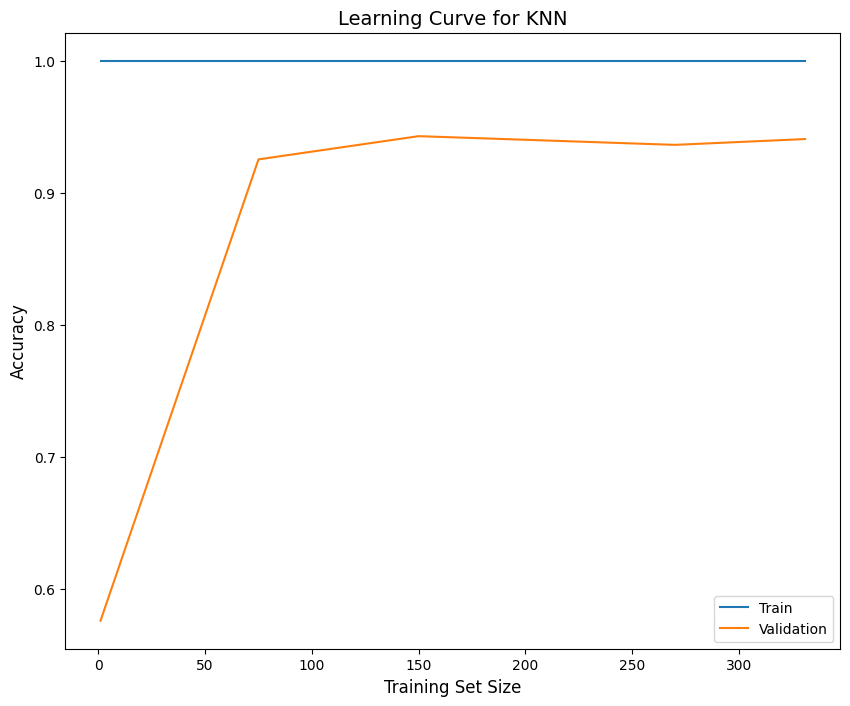

In [40]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve
import numpy as np
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


knn = KNeighborsClassifier(n_neighbors=1)


train_sizes = [1, 75, 150, 270, 331]


train_sizes, train_scores, test_scores = learning_curve(
    estimator=knn,
    X=X_train_scaled,
    y=y_train,
    cv=5,
    scoring="accuracy",
    train_sizes=train_sizes
)


train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)


plt.subplots(figsize=(10, 8))
plt.plot(train_sizes, train_mean, label="Train")
plt.plot(train_sizes, test_mean, label="Validation")


plt.title("Learning Curve for KNN", fontsize=14)
plt.xlabel("Training Set Size", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.legend(loc="best")

plt.show()

# Validation **Curve**

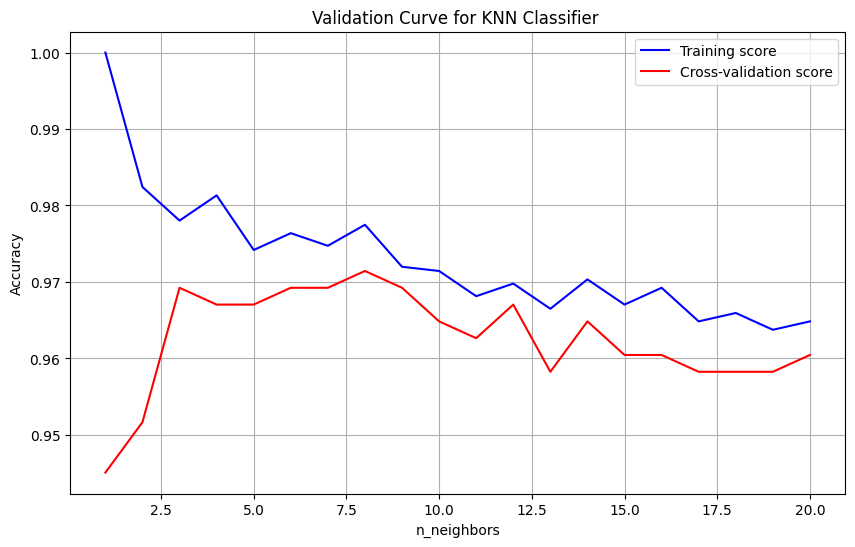

In [100]:

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import validation_curve


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


def plot_validation_curve(estimator, title, X, y, param_name, param_range, cv=5, scoring="accuracy"):
    train_scores, test_scores = validation_curve(
        estimator=estimator,
        X=X,
        y=y,
        param_name=param_name,
        param_range=param_range,
        cv=cv,
        scoring=scoring
    )

    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(param_range, train_mean, label="Training score", color="blue")
    plt.plot(param_range, test_mean, label="Cross-validation score", color="red")

    plt.title(title)
    plt.xlabel(param_name)
    plt.ylabel("Accuracy")
    plt.legend(loc="best")
    plt.grid()
    plt.show()

# KNN Classifier
knn = KNeighborsClassifier()
param_range = np.arange(1, 21)
plot_validation_curve(
    knn,
    "Validation Curve for KNN Classifier ",
    X_train_scaled,
    y_train,
    "n_neighbors",
    param_range,
    cv=5,
    scoring="accuracy"
)

# Precision-Recall **Curve**

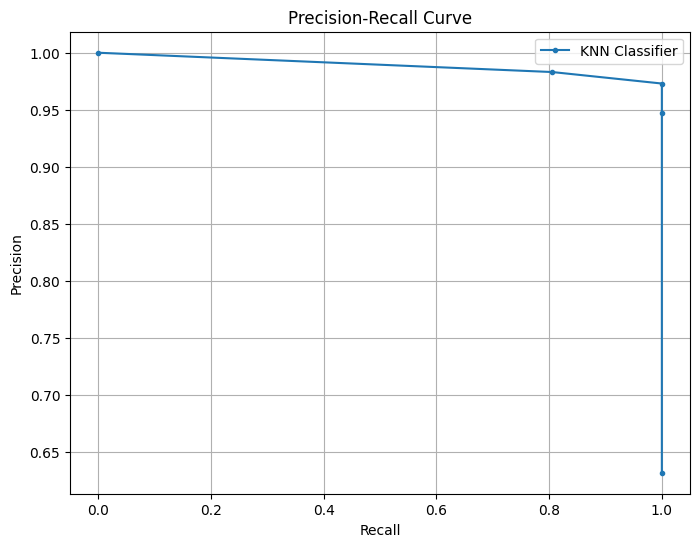

In [96]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)
y_probs_knn = knn.predict_proba(X_test_scaled)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, y_probs_knn)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker=".", label="KNN Classifier")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.grid()
plt.show()

# **(ROC) Curve**

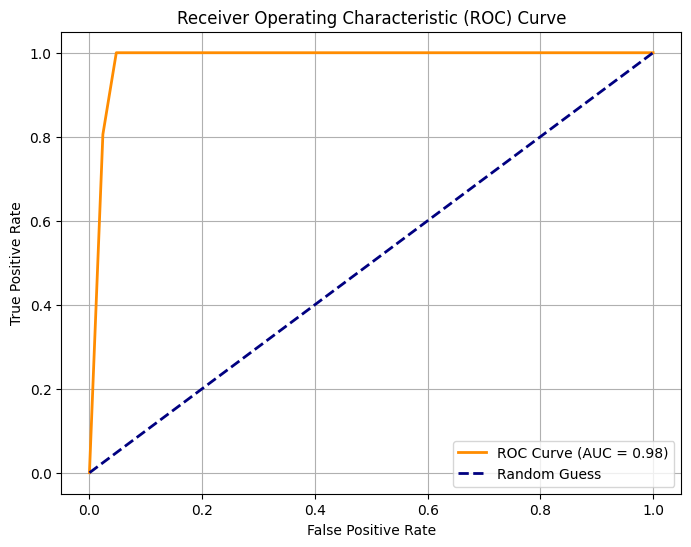

In [43]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)


y_probs_knn = knn.predict_proba(X_test_scaled)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_probs_knn)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--", label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [44]:
import eli5
from eli5.sklearn import PermutationImportance

In [45]:
import eli5
from eli5.sklearn import PermutationImportance
from IPython.display import display
import pandas as pd


feature_names = data.feature_names
X_train_df = pd.DataFrame(X_train, columns=feature_names)
X_test_df = pd.DataFrame(X_test, columns=feature_names)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_df)
X_test_scaled = scaler.transform(X_test_df)


knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)


y_pred_knn = knn.predict(X_test_scaled)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'KNN Classifier Accuracy: {accuracy_knn:.2f}')


print("\nELI5 Explanation for KNN Classifier:")
perm = PermutationImportance(knn, random_state=42).fit(X_test_scaled, y_test)
display(eli5.show_weights(perm, feature_names=feature_names.tolist()))  # Display properly

KNN Classifier Accuracy: 0.98

ELI5 Explanation for KNN Classifier:


In [46]:
y_test.iloc[0]

0

In [47]:
X_test.iloc[0]

mean radius                1.540126
mean texture               2.206141
mean perimeter             1.714788
mean area                  1.570260
mean smoothness           -0.267602
mean compactness           1.932274
mean concavity             1.124934
mean concave points        1.689012
mean symmetry              0.297119
mean fractal dimension    -0.067706
radius error               1.578769
texture error             -0.032392
perimeter error            2.124642
area error                 1.453497
smoothness error          -0.228336
compactness error          1.239175
concavity error            0.223355
concave points error       0.550517
symmetry error            -0.143151
fractal dimension error    0.551149
worst radius               1.818352
worst texture              1.724968
worst perimeter            2.124886
worst area                 1.837752
worst smoothness          -0.187118
worst compactness          1.772508
worst concavity            0.733597
worst concave points       1.210420
worst symmetry            -0.133881
worst fractal dimension    0.917364
Name: 256, dtype: float64

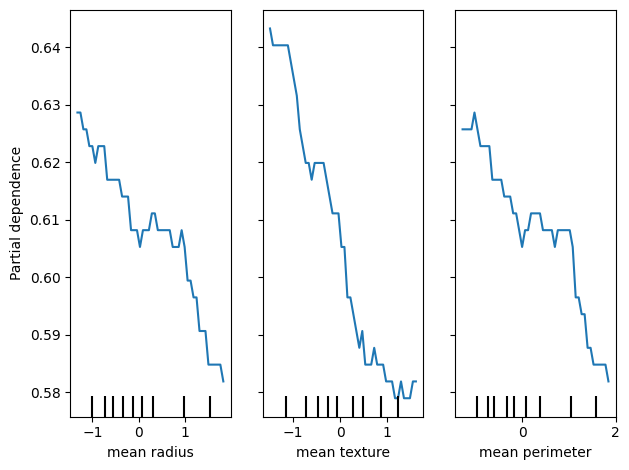

In [50]:
from sklearn.inspection import PartialDependenceDisplay
features =[0,1,2]
target_class = 0
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
PartialDependenceDisplay.from_estimator(
    knn,
    X_test,
    features=features,
    target=target_class,
    feature_names=data.feature_names,
    grid_resolution=50,
    n_cols=3
)


plt.tight_layout()


plt.show()

# **LOFO**

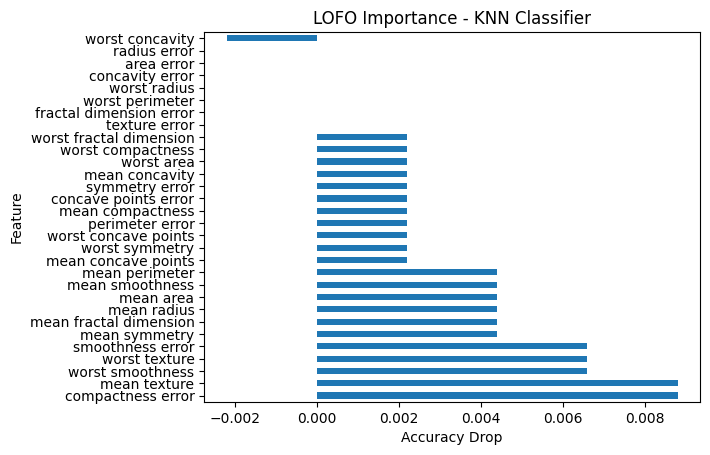

In [51]:
feature_names = data.feature_names
X_train_df = pd.DataFrame(X_train, columns=feature_names)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_df)
knn = KNeighborsClassifier(n_neighbors=3)
baseline = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy').mean()
lofo_scores = {}
for col in X_train_df.columns:
    X_lofo = X_train_df.drop(columns=[col])
    X_lofo_scaled = scaler.fit_transform(X_lofo)
    score = cross_val_score(knn, X_lofo_scaled, y_train, cv=5, scoring='accuracy').mean()
    lofo_scores[col] = baseline - score
lofo_df = pd.Series(lofo_scores).sort_values(ascending=False)


lofo_df.plot(kind='barh')
plt.title("LOFO Importance - KNN Classifier")
plt.xlabel("Accuracy Drop")
plt.ylabel("Feature")
plt.show()

In [60]:
import random
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from artemis.interactions_methods.model_agnostic import FriedmanHStatisticMethod

random.seed(8)

X_exp = random.choices(X_train.values.tolist(), k=100)
X_exp_df = pd.DataFrame(X_exp, columns=feature_names)


X_exp_scaled = scaler.transform(X_exp_df)


X_exp_scaled_df = pd.DataFrame(X_exp_scaled, columns=feature_names)


h_stat = FriedmanHStatisticMethod()
h_stat.fit(knn, X_exp_scaled_df)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_base.py:838: UserWarning:

X has feature names, but KNeighborsClassifier was fitted without feature names

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_base.py:838: UserWarning:

X has feature names, but KNeighborsClassifier was fitted without feature names

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_base.py:838: UserWarning:

X has feature names, but KNeighborsClassifier was fitted without feature names

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_base.py:838: UserWarning:

X has feature names, but KNeighborsClassifier was fitted without feature names

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_base.py:838: UserWarning:

X has feature names, but KNeighborsClassifier was fitted without feature names

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_base.py:838: UserWarning:

X has feature names, but KNeighbo

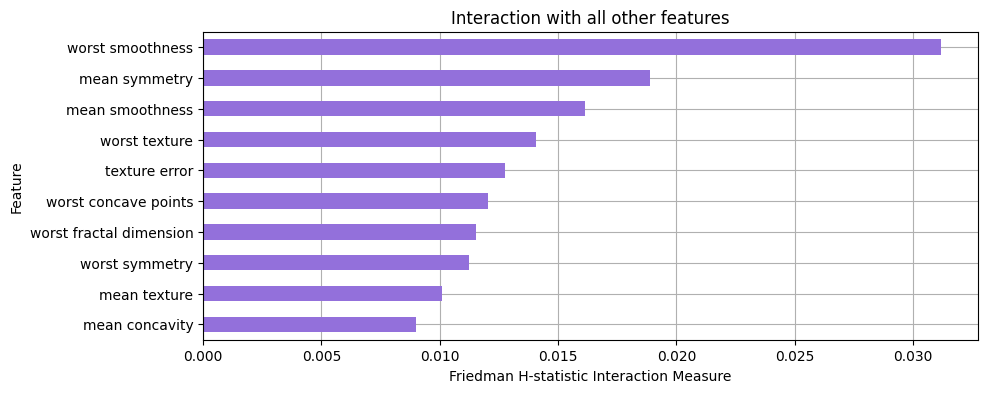

In [62]:
# Overall interaction plot
fig, ax = plt.subplots(figsize=(10, 4))
h_stat.plot('bar_chart_ova',ax=ax)

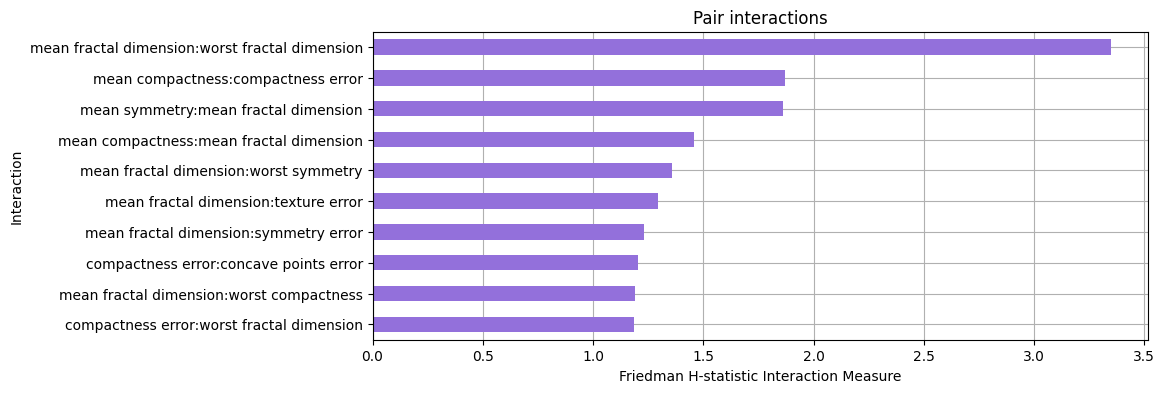

In [63]:
# Pairwise interactions
fig, ax = plt.subplots(figsize=(10, 4))
h_stat.plot(vis_type='bar_chart',ax=ax)

/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:459: FutureWarning:

Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior

/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:459: FutureWarning:

Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior



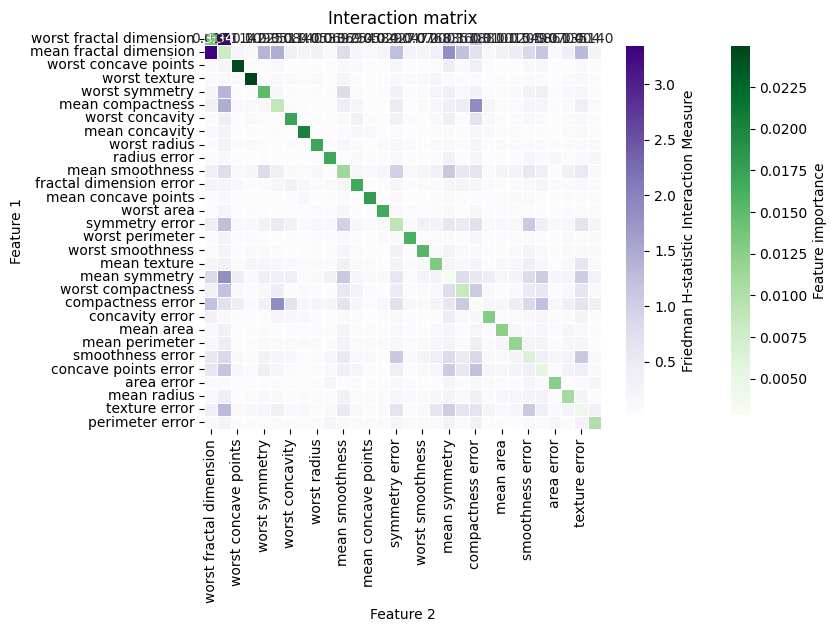

In [65]:
# Interaction heatmap
h_stat.plot()

# **LIME**

In [74]:
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train_scaled),
    feature_names=feature_names.tolist(),
    class_names=['malignant', 'benign'],
    mode='classification',
    discretize_continuous=True
)

i = 0
exp = explainer.explain_instance(
    data_row=X_test_scaled[i],
    predict_fn=knn.predict_proba,
    num_features=len(feature_names)
)


exp.show_in_notebook(show_table=True, show_all=False)

In [76]:
import shap

  0%|          | 0/114 [00:00<?, ?it/s]

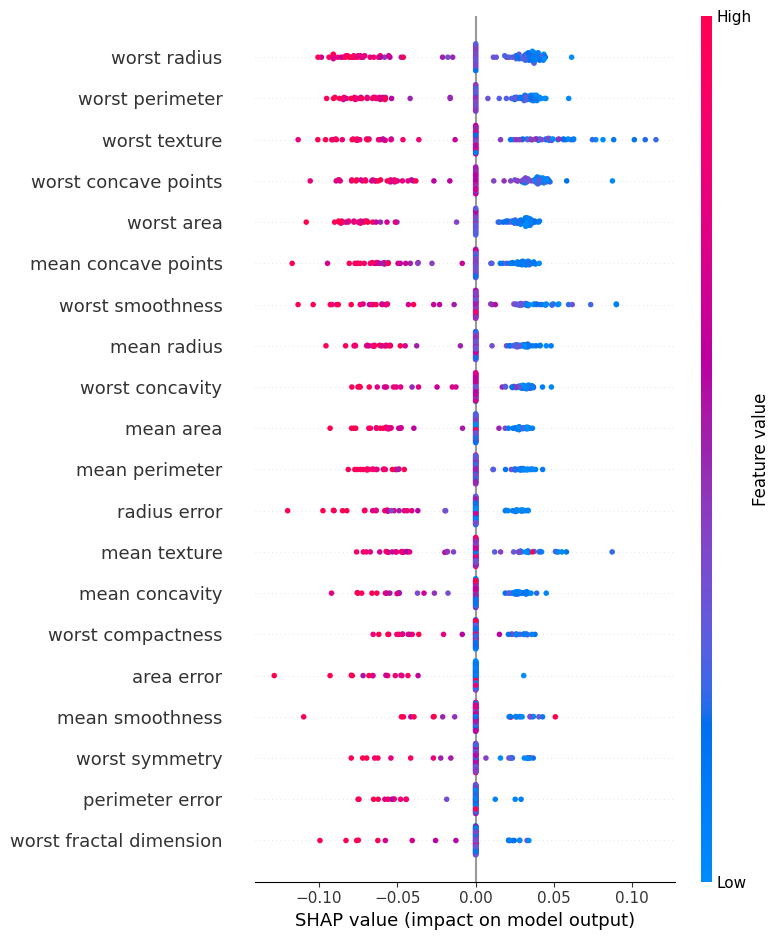

In [88]:
background_data = shap.sample(X_train_scaled, 100)

# Set up SHAP KernelExplainer
explainer = shap.KernelExplainer(knn.predict_proba, background_data)

# Compute SHAP values for the test set
shap_values = explainer.shap_values(X_test_scaled)

# Summary plot (beeswarm) for class 1 (benign)
plt.figure()
shap.summary_plot(shap_values[:, :, 1], X_test_scaled, feature_names=feature_names, show=True)
plt.show()

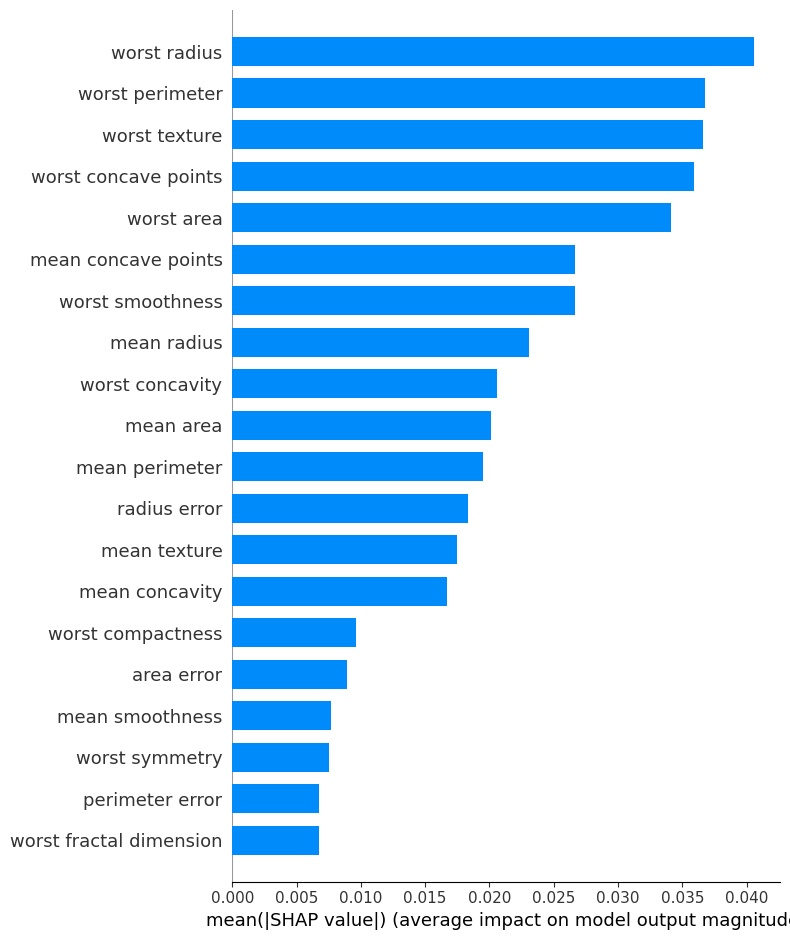

In [89]:
plt.figure()
shap.summary_plot(shap_values[:, :, 1], X_test_scaled, feature_names=feature_names, plot_type="bar", show=True)
plt.close()

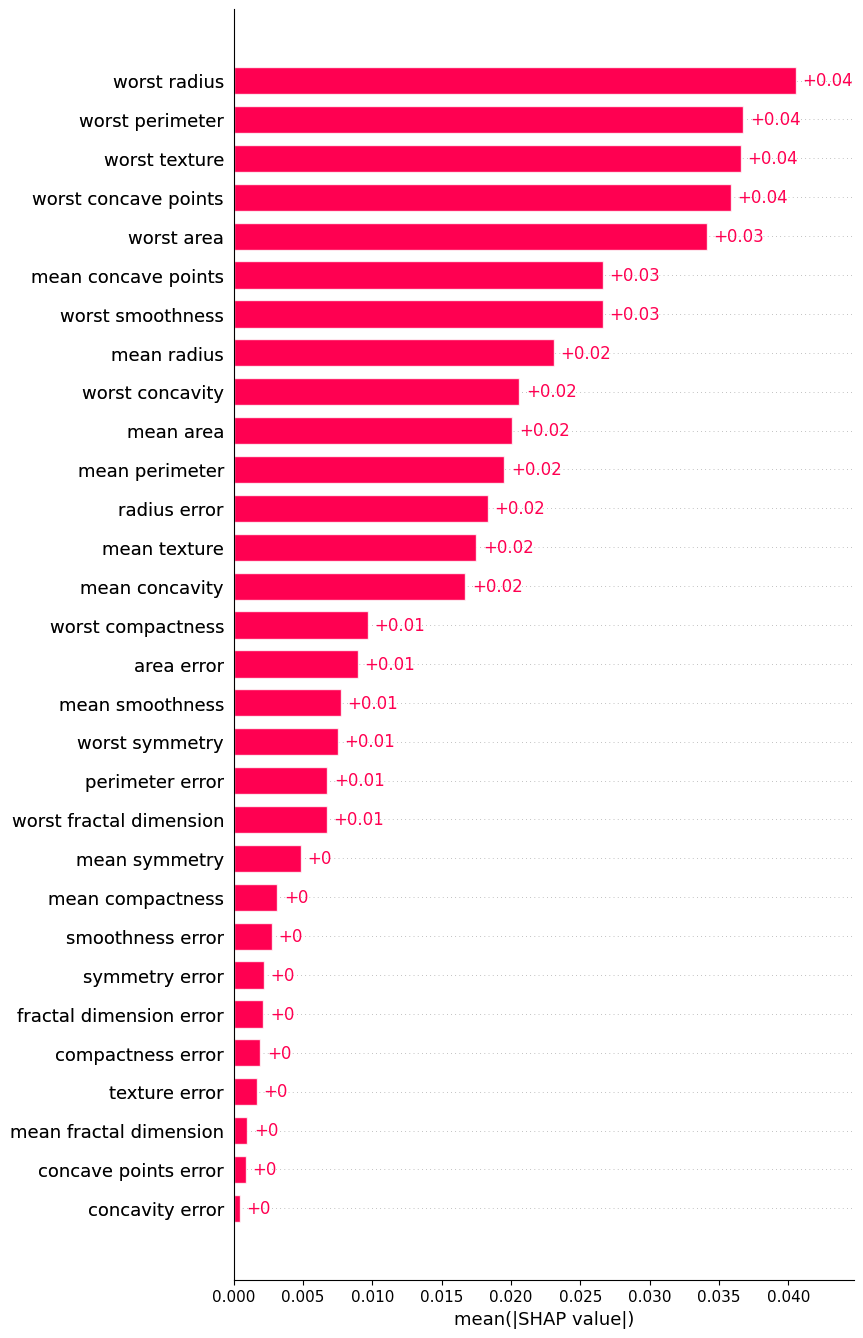

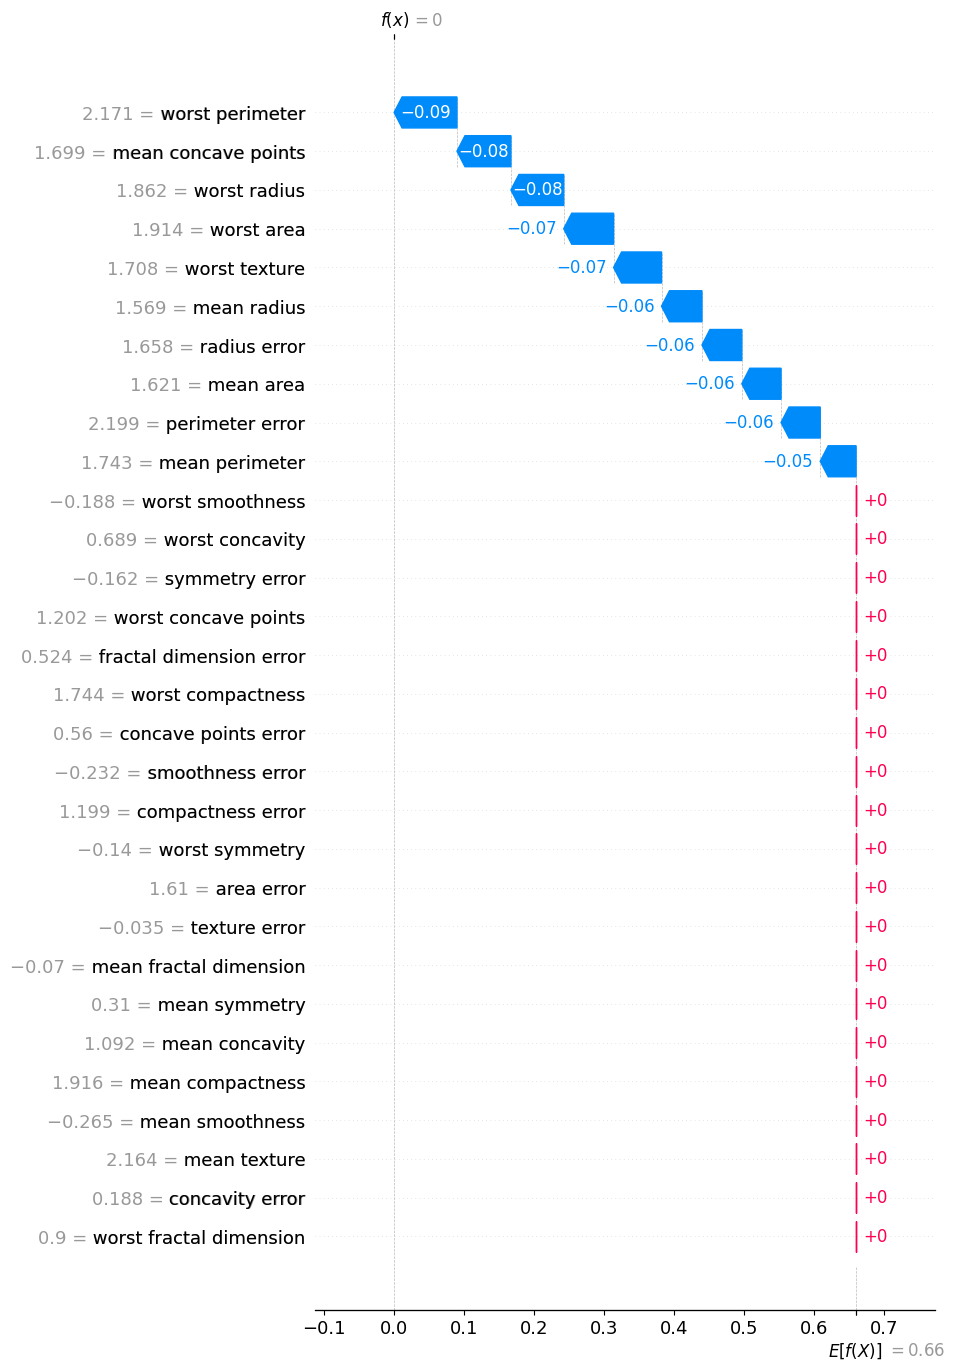

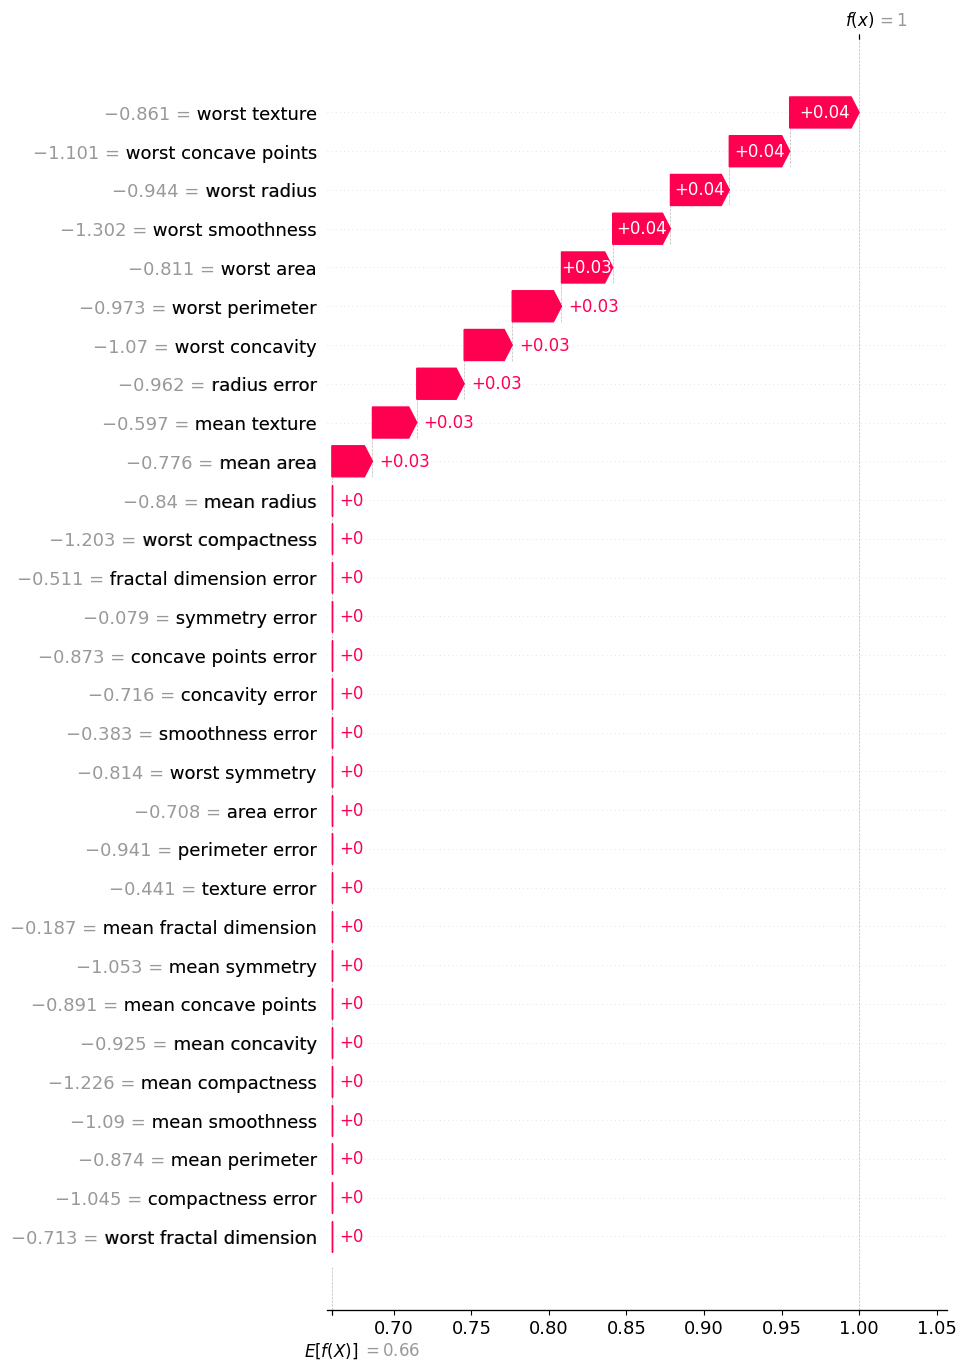

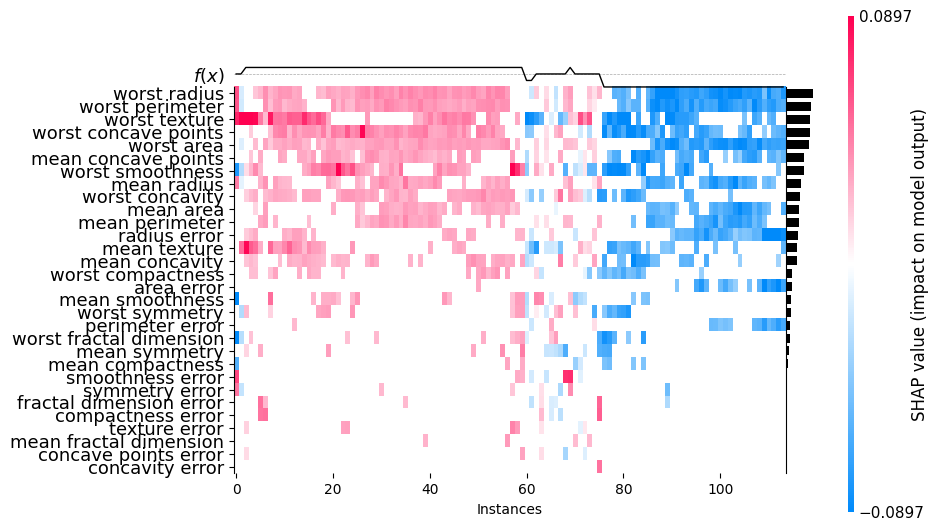

In [90]:
explanation = shap.Explanation(
    values=shap_values[:, :, 1],
    base_values=explainer.expected_value[1],
    data=X_test_scaled,
    feature_names=feature_names
)

num_features = len(feature_names)

# Bar plot for global feature importance
plt.figure()
shap.plots.bar(explanation, max_display=num_features, show=True)
plt.close()

# Waterfall plot for the first test sample
plt.figure()
shap.plots.waterfall(explanation[0], max_display=num_features, show=True)
plt.close()

# Waterfall plot for the second test sample
plt.figure()
shap.plots.waterfall(explanation[1], max_display=num_features, show=True)
plt.close()

# Heatmap of SHAP values across test samples
plt.figure()
shap.plots.heatmap(explanation, max_display=num_features, show=True)
plt.close()

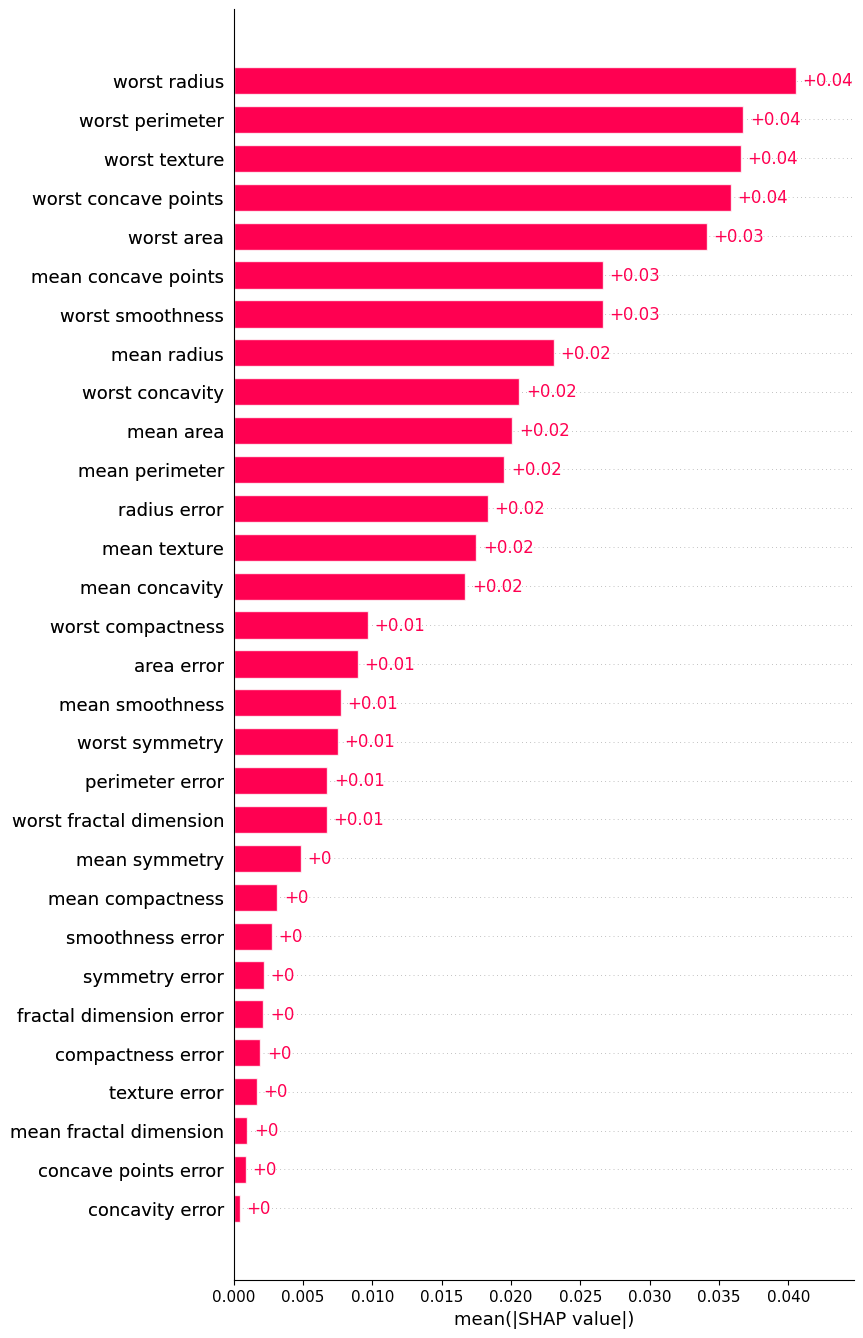

In [91]:
num_features = len(feature_names)

# Bar plot for global feature importance
plt.figure()
shap.plots.bar(explanation, max_display=num_features, show=True)
plt.close()

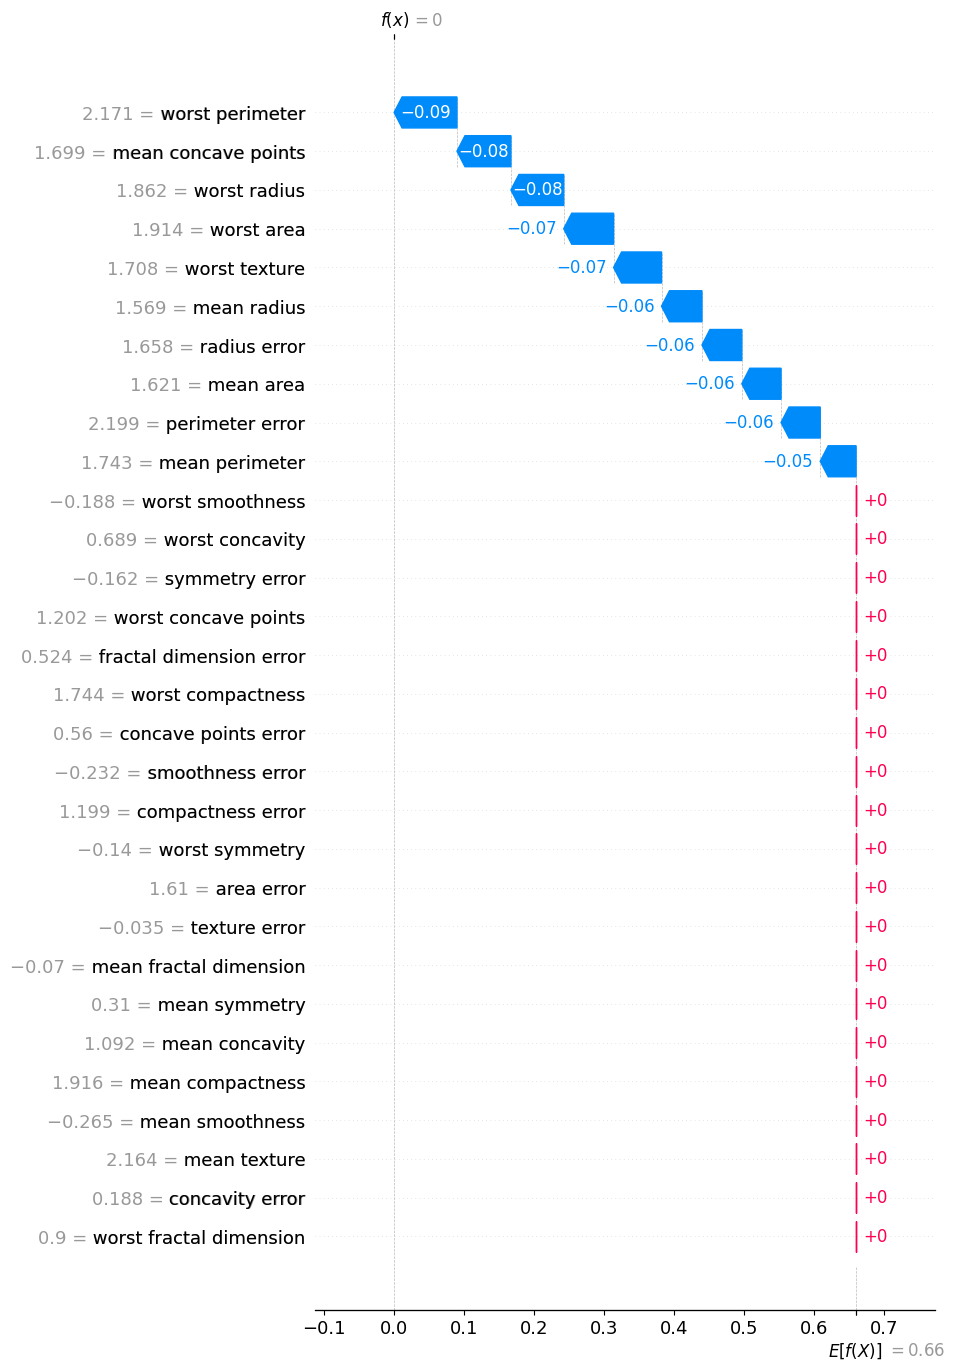

In [92]:
plt.figure()
shap.plots.waterfall(explanation[0], max_display=num_features, show=True)
plt.close()

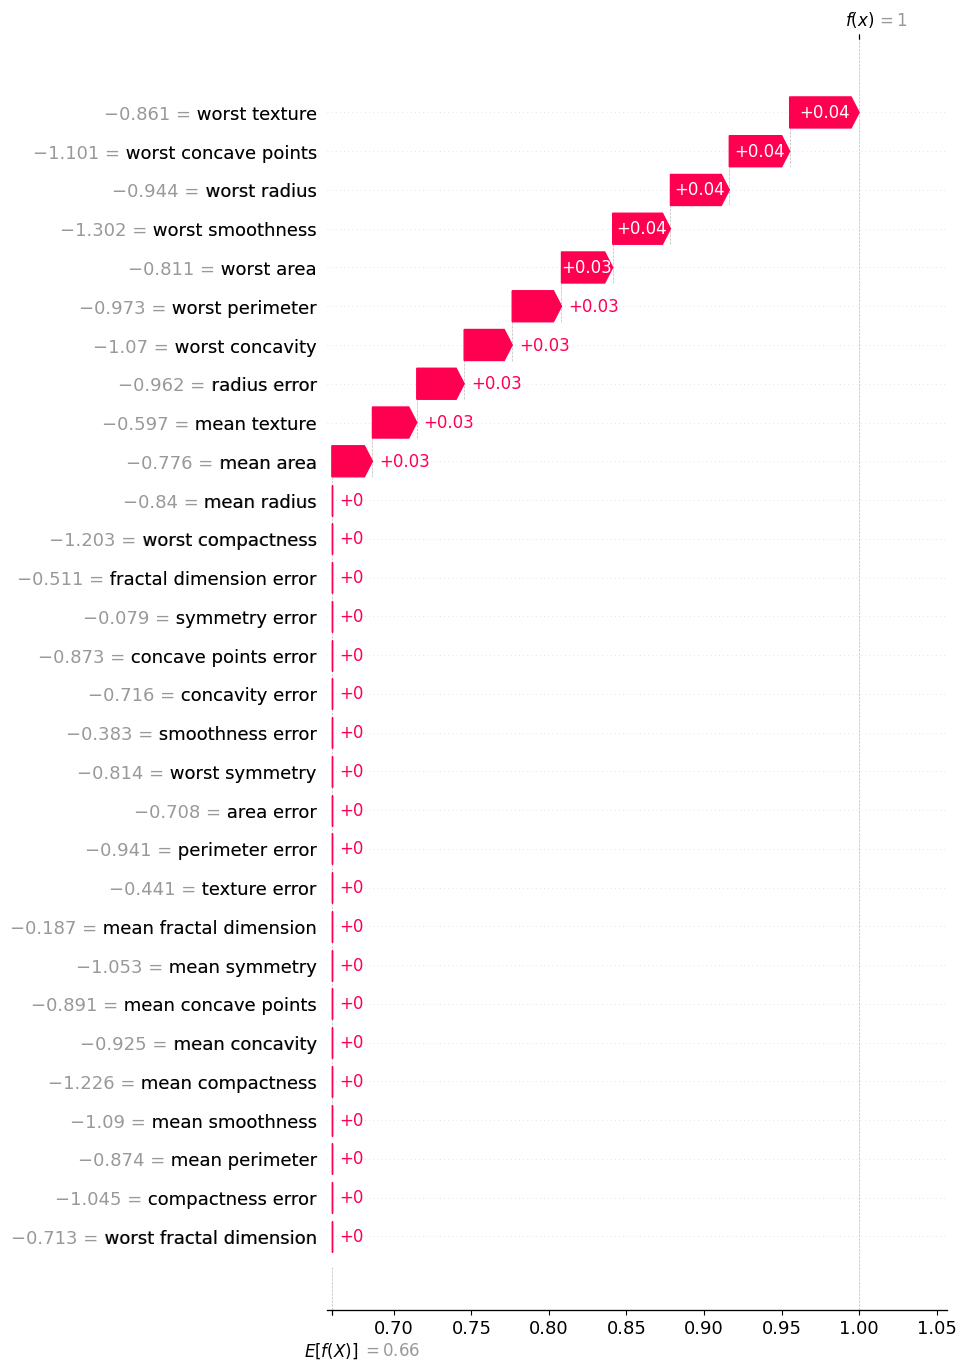

In [93]:
plt.figure()
shap.plots.waterfall(explanation[1], max_display=num_features, show=True)
plt.close()

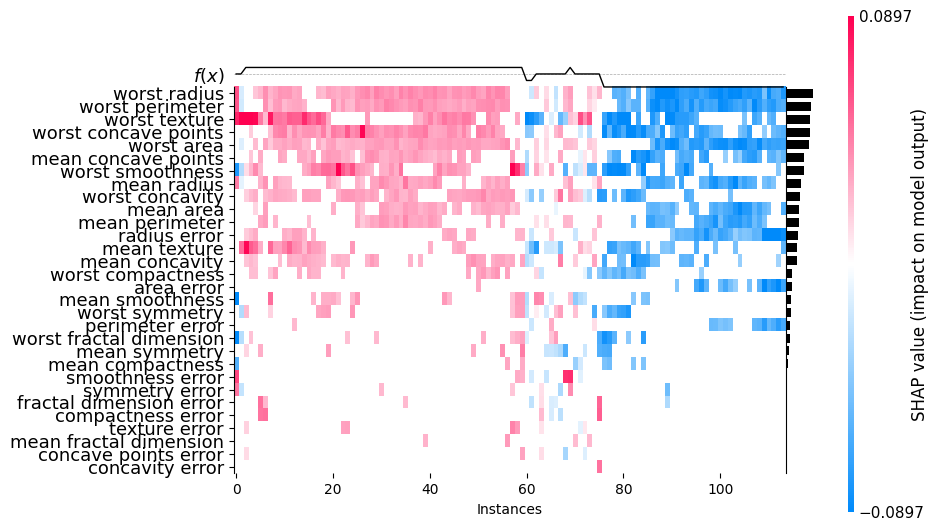

In [94]:
plt.figure()
shap.plots.heatmap(explanation, max_display=num_features, show=True)
plt.close()